Angelina 202131152

UTS Pemrograman mesin (A)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data yang akan dibaca

In [2]:
data = pd.read_csv('Data Calon Nasabah.csv',delimiter=";")
data

,Penghasilan,Status Rumah,Besar Pinjam,Besar Kredit,"Lama Pinjam,,"
0,"2,5jt",Sendiri,"7,5jt",782000,12
1,"3,5jt",Sewa,5jt,520000,"12,"
2,"3,5jt",Sewa,15jt,937500,"24,"
3,"2,5jt",Sendiri,"7,5jt",782000,12
4,"1,75jt",Sendiri,5jt,520000,"12,"
5,"3,5jt",Sewa,10jt,763900,"18,"
6,"1,75jt",Sendiri,"7,5jt",782000,6
7,"2,5jt",Sewa,5jt,937500,"6,"
8,5jt,Sendiri,15jt,937500,"24,,"
9,5jt,Sewa,10jt,763900,"18,,"


Membuat data frame dari data calon nasabah

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Penghasilan    10 non-null     object
 1   Status Rumah   10 non-null     object
 2   Besar Pinjam   10 non-null     object
 3   Besar Kredit   10 non-null     int64 
 4   Lama Pinjam,,  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [4]:
data['Penghasilan'].unique()

array(['2,5jt', '3,5jt', '1,75jt', '5jt'], dtype=object)

In [5]:
DataBaru = ['Penghasilan','Status Rumah','Besar Pinjam','Besar Kredit','Lama Pinjam,,']
for i in DataBaru:
    print(data[i].unique())

['2,5jt' '3,5jt' '1,75jt' '5jt']
['Sendiri' 'Sewa']
['7,5jt' '5jt' '15jt' '10jt']
[782000 520000 937500 763900]
['12' '12,' '24,' '18,' '6' '6,' '24,,' '18,,']


In [6]:
Penghasilan_map = ({
    '2,5jt':1,
    '3,5jt':2,
    '1,75jt':3,
    '5jt':4
})
StatusRumah_map = ({
    'Sendiri':1,
    'Sewa':2,
})
BesarPinjam_map = ({
    '7,5jt':1,
    '5jt':2,
    '15jt':3,
    '10jt':4
})
BesarKredit_map = ({
    '782000':1,
    '520000':2,
    '937500':3,
    '763900':4
})
LamaPinjam_map = ({
    '12':1,
    '24':2,
    '18':3,
    '6' :4
})

In [7]:
Databarukali_map = [Penghasilan_map,StatusRumah_map,BesarPinjam_map,BesarKredit_map,LamaPinjam_map]
data['Penghasilan']=data['Penghasilan'].map(Penghasilan_map)
data['Penghasilan']

0    1
1    2
2    2
3    1
4    3
5    2
6    3
7    1
8    4
9    4
Name: Penghasilan, dtype: int64

In [8]:
Databarukali_map = [Penghasilan_map,StatusRumah_map,BesarPinjam_map,BesarKredit_map,LamaPinjam_map]
data['Status Rumah']=data['Status Rumah'].map(StatusRumah_map)
data['Status Rumah']

0    1
1    2
2    2
3    1
4    1
5    2
6    1
7    2
8    1
9    2
Name: Status Rumah, dtype: int64

In [9]:
Databarukali_map = [Penghasilan_map,StatusRumah_map,BesarPinjam_map,BesarKredit_map,LamaPinjam_map]
data['Besar Pinjam']=data['Besar Pinjam'].map(BesarPinjam_map)
data ['Besar Pinjam']

0    1
1    2
2    3
3    1
4    2
5    4
6    1
7    2
8    3
9    4
Name: Besar Pinjam, dtype: int64

In [10]:
data

,Penghasilan,Status Rumah,Besar Pinjam,Besar Kredit,"Lama Pinjam,,"
0,1,1,1,782000,12
1,2,2,2,520000,"12,"
2,2,2,3,937500,"24,"
3,1,1,1,782000,12
4,3,1,2,520000,"12,"
5,2,2,4,763900,"18,"
6,3,1,1,782000,6
7,1,2,2,937500,"6,"
8,4,1,3,937500,"24,,"
9,4,2,4,763900,"18,,"


In [13]:
x = np.asarray(data.drop(['Lama Pinjam,,'],axis=1))
y = np.asarray(data['Lama Pinjam,,'])
y

array(['12', '12,', '24,', '12', '12,', '18,', '6', '6,', '24,,', '18,,'],
      dtype=object)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [15]:
x_baru = np.array([[1,2,1,78200]])
y_baru = model.predict(x_baru)
y_baru

array(['12,'], dtype=object)

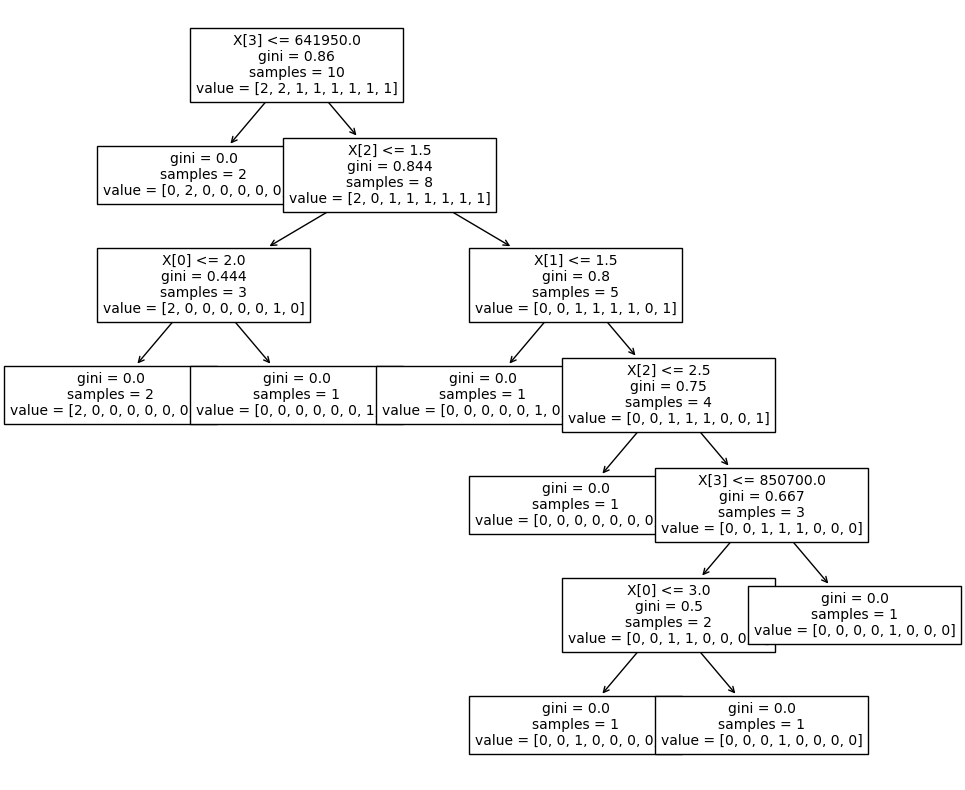

In [16]:
from sklearn.tree import plot_tree
plt.subplots(figsize=(12,10))
plot_tree(model, fontsize = 10)
plt.show()